# **Data Journalism** - Navigating Future Opportunities: An Insightful Exploration of Canadian Employment Wages and Trends

In an era where industry landscapes are rapidly evolving, understanding the dynamics of occupational trends and wages becomes pivotal for aspiring professionals and students aiming to position themselves advantageously in the job market. "Navigating Future Opportunities" delves deep into the fabric of Canada's employment sectors, employing a comprehensive exploratory data analysis (EDA) of recent wage statistics to unravel the nuances of various occupations and industries.

> 1) **Exploratory Data Analysis** <br>
> 2) **Generative AI**<br>

This project is structured into two main parts: an in-depth EDA segment, which leverages data visualization to highlight key trends, disparities, and insights within Canadian employment wages across different sectors, and a generative AI segment, aimed at interpreting these findings through the lens of data journalism. The primary objective of our analysis is to offer a granular look at which industries and occupations hold the promise of prosperity, growth, and stability. By identifying sectors that are leading in wage trends and those that lag, we aim to provide a roadmap for individuals to make informed decisions about their careers and educational paths, ultimately getting ahead in the game.

## **Pre-requisite Actions**

In [5]:
# Import necessary packages
!pip install openai --quiet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openai import OpenAI
import os

# added this pkg to implement a csv sniffer:
import csv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.3/268.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.0 MB/s eta 0:00:00


## **Download the Dataset:**

 >* **Folder Access**: [Click to download the Employee Wages Data](https://drive.google.com/drive/folders/19z4KBZxFu6g4Hgmw9jkYU-WBBHzxFrnh?usp=sharing) <br>
 Sourced from: [Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410041701&pickMembers%5B0%5D=1.1&pickMembers%5B1%5D=2.1&pickMembers%5B2%5D=3.1&pickMembers%5B3%5D=5.1&pickMembers%5B4%5D=6.1&cubeTimeFrame.startYear=2018&cubeTimeFrame.endYear=2023&referencePeriods=20180101%2C20230101)

## **Get to know the Data**




In [6]:
# Check data types, row/column headers
# Check the csv delimeter types (\t or ; or ,) to specify the separation between data
# Pick the correct csv file for each task where relevant

# reference url: https://docs.python.org/3/library/csv.html
# csv delimeter function to reuse:
def sniff_csv_delimiter(csv_file):
    with open(csv_file, newline='') as csv_file_to_sniff:
        try:
            dialect = csv.Sniffer().sniff(csv_file_to_sniff.read(1024))
            csv_file_to_sniff.seek(0)  # Return to the start of the file after reading
            return dialect.delimiter
        except csv.Error:
            print("Could not determine the delimiter. Please inspect the file manually.")

In [7]:
# upload all datasets and add them into a dict to make it easy for selecting the
# correct data and delimiter later on:
from google.colab import files
uploaded = files.upload()

# create a dictionary for the delimeters:
file_and_delimeter_dict = {}

# loop through the files uploaded, sniff it, and update the dictionary:
for file_name, data in uploaded.items():
    try:
        with open(file_name, 'r', encoding='utf-8') as f:
            first_line = f.readline()
            sniffer = csv.Sniffer()
            dialect = sniffer.sniff(first_line)
            file_and_delimeter_dict[file_name] = dialect.delimiter

            print(f"Detected delimiter for '{file_name}': {dialect.delimiter}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

# caveat: the delimeter '\t' is literally a tab! The sniffer display a tab space,
# therefore, you will not see '\t' in the dict

Saving Average_Hourly_Wages_Female_Canadian.csv to Average_Hourly_Wages_Female_Canadian.csv
Saving Average_Hourly_Wages_Male_Canadian.csv to Average_Hourly_Wages_Male_Canadian.csv
Saving Average_Hourly_Wages_Overall_Canadian.csv to Average_Hourly_Wages_Overall_Canadian.csv
Saving Average_Weekly_Wages_Full-time_Canadian.csv to Average_Weekly_Wages_Full-time_Canadian.csv
Saving Average_Weekly_Wages_Part-time_Canadian.csv to Average_Weekly_Wages_Part-time_Canadian.csv
Saving Total_Employee_Wages_Canadian.csv to Total_Employee_Wages_Canadian.csv
Detected delimiter for 'Average_Hourly_Wages_Female_Canadian.csv': ,
Detected delimiter for 'Average_Hourly_Wages_Male_Canadian.csv': ,
Detected delimiter for 'Average_Hourly_Wages_Overall_Canadian.csv': 	
Detected delimiter for 'Average_Weekly_Wages_Full-time_Canadian.csv': ,
Detected delimiter for 'Average_Weekly_Wages_Part-time_Canadian.csv': ,
Detected delimiter for 'Total_Employee_Wages_Canadian.csv': ,


In [8]:
# get to know the Average_Hourly_Wages_Female_Canadian.csv file:
file_female_canadian = list(file_and_delimeter_dict)[0]
file_delimeter_female_canadian = file_and_delimeter_dict[file_female_canadian]
df_female_canadian = pd.read_csv(file_female_canadian, sep=file_delimeter_female_canadian)

print(f"File {file_female_canadian} info:")
df_female_canadian.info()

File Average_Hourly_Wages_Female_Canadian.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    354 non-null    int64  
 1   GEO                                         354 non-null    object 
 2   DGUID                                       354 non-null    object 
 3   Wages                                       354 non-null    object 
 4   Type of work                                354 non-null    object 
 5   National Occupational Classification (NOC)  354 non-null    object 
 6   Sex                                         354 non-null    object 
 7   Age group                                   354 non-null    object 
 8   UOM                                         354 non-null    object 
 9   UOM_ID                             

In [9]:
# get to know the Average_Hourly_Wages_Male_Canadian.csv file:
file_male_canadian = list(file_and_delimeter_dict)[1]
file_delimeter_male_canadian = file_and_delimeter_dict[file_male_canadian]
df_male_canadian = pd.read_csv(file_male_canadian, sep=file_delimeter_male_canadian)

print(f"File {file_male_canadian} info:")
df_male_canadian.info()

File Average_Hourly_Wages_Male_Canadian.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    354 non-null    int64  
 1   GEO                                         354 non-null    object 
 2   DGUID                                       354 non-null    object 
 3   Wages                                       354 non-null    object 
 4   Type of work                                354 non-null    object 
 5   National Occupational Classification (NOC)  354 non-null    object 
 6   Sex                                         354 non-null    object 
 7   Age group                                   354 non-null    object 
 8   UOM                                         354 non-null    object 
 9   UOM_ID                               

In [10]:
# get to know the Average_Hourly_Wages_Overall_Canadian.csv file:
file_overall_canadian = list(file_and_delimeter_dict)[2]
file_delimeter_overall_canadian = file_and_delimeter_dict[file_overall_canadian]
df_overall_canadian = pd.read_csv(file_overall_canadian, sep=file_delimeter_overall_canadian)

print(f"File {file_overall_canadian} info:")
df_overall_canadian.info()

File Average_Hourly_Wages_Overall_Canadian.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    708 non-null    int64  
 1   GEO                                         708 non-null    object 
 2   DGUID                                       708 non-null    object 
 3   Wages                                       708 non-null    object 
 4   Type of work                                708 non-null    object 
 5   National Occupational Classification (NOC)  708 non-null    object 
 6   Sex                                         708 non-null    object 
 7   Age group                                   708 non-null    object 
 8   UOM                                         708 non-null    object 
 9   UOM_ID                            

In [11]:
# get to know the Average_Weekly_Wages_Full-time_Canadian.csv.csv file:
file_full_time_canadian = list(file_and_delimeter_dict)[3]
file_delimeter_full_time_canadian = file_and_delimeter_dict[file_full_time_canadian]
df_full_time_canadian = pd.read_csv(file_full_time_canadian, sep=file_delimeter_full_time_canadian)

print(f"File {file_full_time_canadian} info:")
df_full_time_canadian.info()

File Average_Weekly_Wages_Full-time_Canadian.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    354 non-null    int64  
 1   GEO                                         354 non-null    object 
 2   DGUID                                       354 non-null    object 
 3   Wages                                       354 non-null    object 
 4   Type of work                                354 non-null    object 
 5   National Occupational Classification (NOC)  354 non-null    object 
 6   Sex                                         354 non-null    object 
 7   Age group                                   354 non-null    object 
 8   UOM                                         354 non-null    object 
 9   UOM_ID                          

In [12]:
# get to know the Average_Weekly_Wages_Part-time_Canadian.csv file:
file_part_time_canadian = list(file_and_delimeter_dict)[4]
file_delimeter_part_time_canadian = file_and_delimeter_dict[file_part_time_canadian]
df_part_time_canadian = pd.read_csv(file_part_time_canadian, sep=file_delimeter_part_time_canadian)

print(f"File {file_part_time_canadian} info:")
df_part_time_canadian.info()

File Average_Weekly_Wages_Part-time_Canadian.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    354 non-null    int64  
 1   GEO                                         354 non-null    object 
 2   DGUID                                       354 non-null    object 
 3   Wages                                       354 non-null    object 
 4   Type of work                                354 non-null    object 
 5   National Occupational Classification (NOC)  354 non-null    object 
 6   Sex                                         354 non-null    object 
 7   Age group                                   354 non-null    object 
 8   UOM                                         354 non-null    object 
 9   UOM_ID                          

In [13]:
# get to know the Total_Employee_Wages_Canadian.csv file:
file_total_employee_canadian = list(file_and_delimeter_dict)[5]
file_delimeter_total_employee_canadian = file_and_delimeter_dict[file_total_employee_canadian]
df_total_employee_canadian = pd.read_csv(file_total_employee_canadian, sep=file_delimeter_total_employee_canadian)

print(f"File {file_total_employee_canadian} info:")
df_total_employee_canadian.info()

File Total_Employee_Wages_Canadian.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    354 non-null    int64  
 1   GEO                                         354 non-null    object 
 2   DGUID                                       354 non-null    object 
 3   Wages                                       354 non-null    object 
 4   Type of work                                354 non-null    object 
 5   National Occupational Classification (NOC)  354 non-null    object 
 6   Sex                                         354 non-null    object 
 7   Age group                                   354 non-null    object 
 8   UOM                                         354 non-null    object 
 9   UOM_ID                                    

# **Exploratory Data Analysis**


### **The Recent Evolution of Wages: A Historical Perspective**

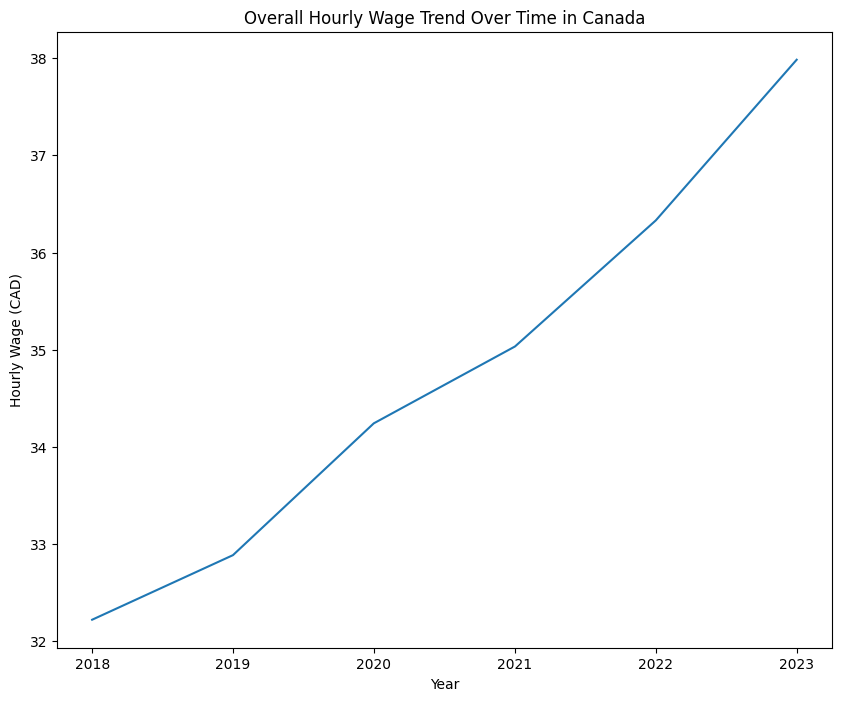

In [21]:
# Task: Create a line plot that shows the overall hourly wage trend over time

df_sorted_by_dates = df_overall_canadian.sort_values(by='REF_DATE')

mean_values_grouped_by_dates = df_sorted_by_dates.groupby('REF_DATE')['VALUE'].mean().reset_index()
mean_values_grouped_by_dates['REF_DATE'] = pd.to_datetime(df_sorted_by_dates['REF_DATE'], format='%Y')

# Visualize your findings and make inferences from the outcomes observed
 # (For the text analysis in the Generational AI section)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Overall Hourly Wage Trend Over Time in Canada')
ax.set_xlabel('Year')
ax.set_ylabel('Hourly Wage (CAD)')
ax.plot(mean_values_grouped_by_dates['REF_DATE'], mean_values_grouped_by_dates['VALUE'])
plt.savefig('trends.png')

### **Job and Financial Security: Choosing Between Casual and Permanent Employment**

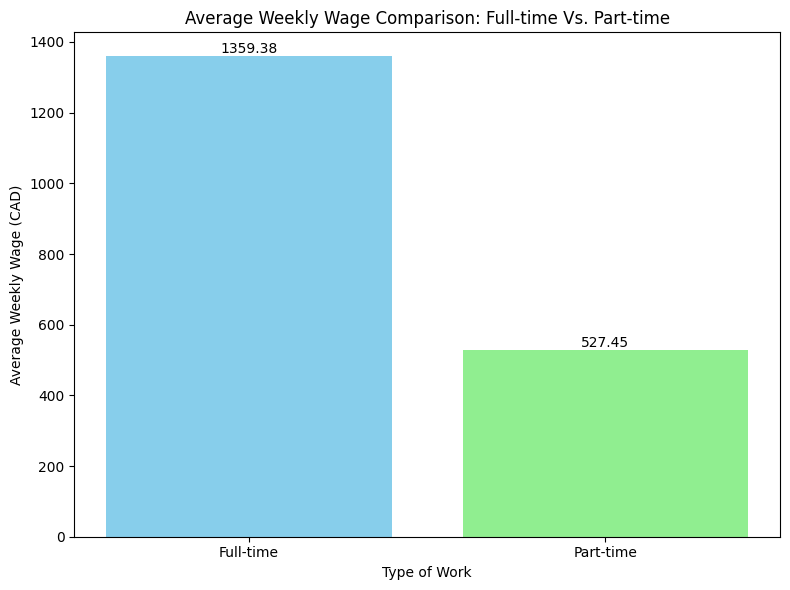

In [22]:
# Compare the average weekly wage between full-time and part-time employees. Use a bar chart to for visualization
# Hint: You may need to filter the dataframe based on the 'Type of work' column and then use groupby and mean to calculate the average wages.
# Calculation method: Find the average between all the available years in the dataset for both type of work
full_time_mean_wage = df_full_time_canadian['VALUE'].mean()
part_time_mean_wage = df_part_time_canadian['VALUE'].mean()

# create a DataFrame for the plotting data
wage_data = {
    'Type of Work': ['Full-time', 'Part-time'],
    'Average Weekly Wage': [full_time_mean_wage, part_time_mean_wage]
}
df_wage_comparison = pd.DataFrame(wage_data)

# Visualize your findings and identify if it is better to be a casual or permanent employee
 # (For the text analysis in the Generational AI section)
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(df_wage_comparison['Type of Work'], df_wage_comparison['Average Weekly Wage'], color=['skyblue', 'lightgreen'])
ax.set_title('Average Weekly Wage Comparison: Full-time Vs. Part-time')
ax.set_xlabel('Type of Work')
ax.set_ylabel('Average Weekly Wage (CAD)')

# annotating the bar chart with the data values
for i, value in enumerate(df_wage_comparison['Average Weekly Wage']):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('job_stability.png')

###**Wage Disparity: A Comparison by Occupation and Gender"**

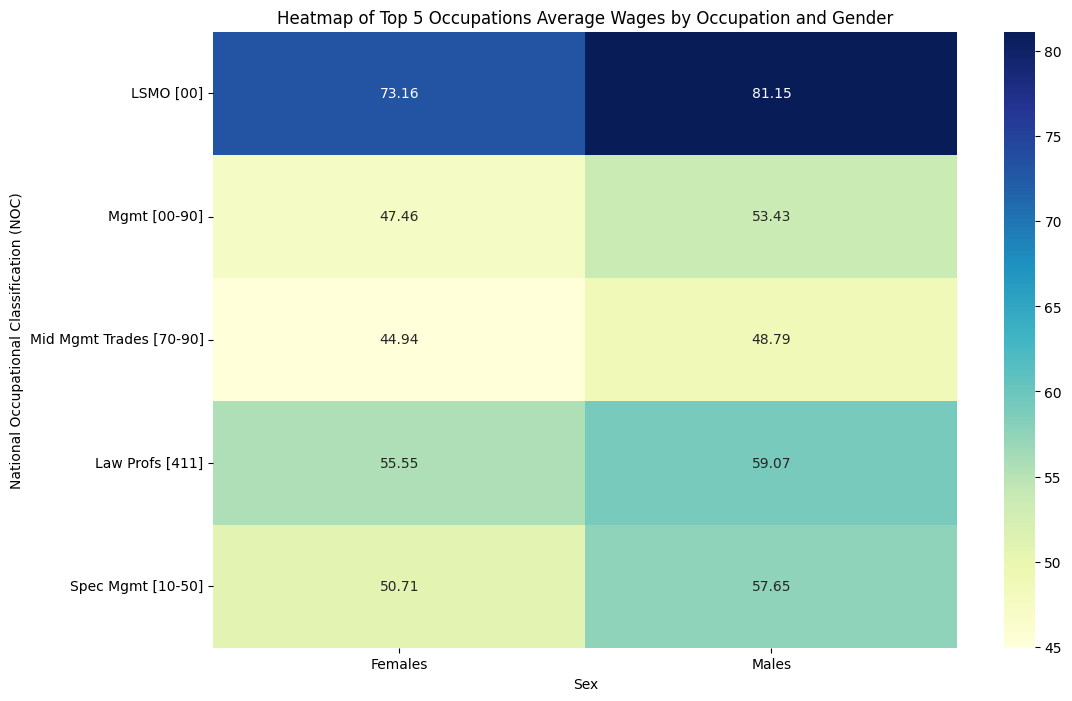

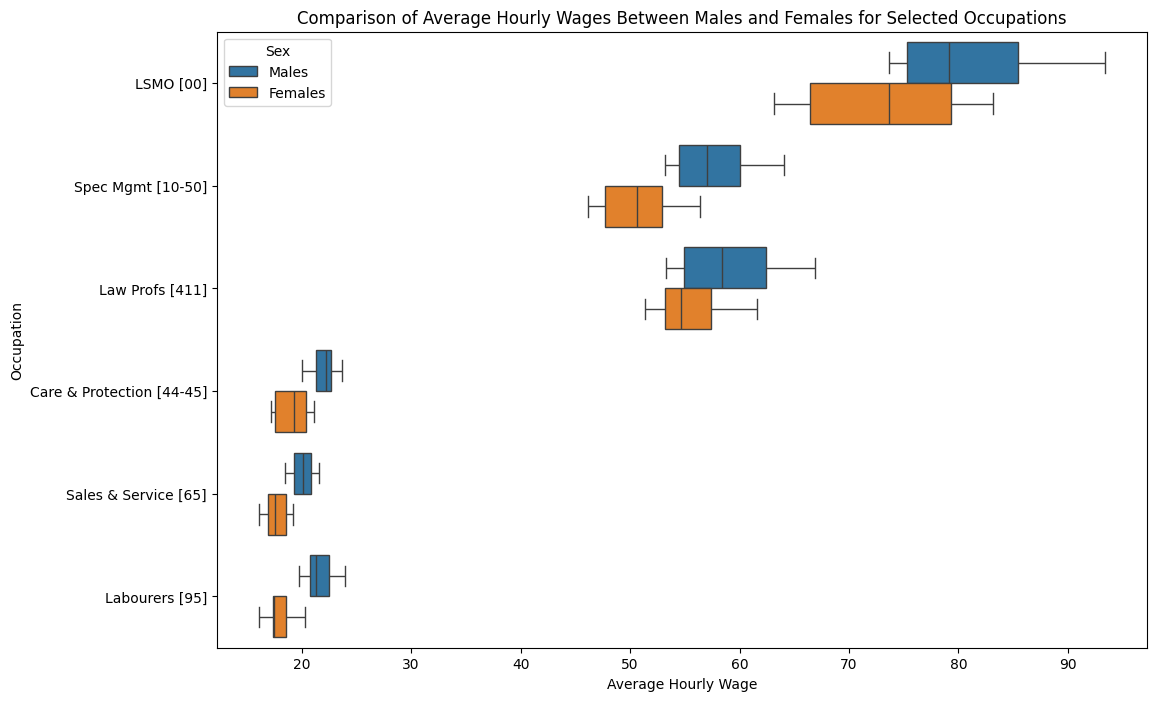

<Figure size 640x480 with 0 Axes>

In [23]:
# Identify the top 5 occupations with the highest average wage
# Plot a heatmap of those top 5 occupations average wages by occupation and gender to visualize the distribution across these dimensions.
# Hint: Group the data by 'National Occupational Classification (NOC)' and calculate the mean wage. Then sort the results and use head() to get the top 5 occupations.
combined_df = pd.concat([df_male_canadian,df_female_canadian])

grouped_by_noc = combined_df.groupby('National Occupational Classification (NOC)')['VALUE'].mean()
top_5_occupations = grouped_by_noc.sort_values(ascending=False).head(5)

top_5_df = combined_df[combined_df['National Occupational Classification (NOC)'].isin(top_5_occupations.index)]
heatmap_data = top_5_df.groupby(['National Occupational Classification (NOC)', 'Sex'])['VALUE'].mean().unstack()

# abbreviate the names for a better visualization of the plot:
abbreviations = {
    'Legislative and senior management occupations [00]': 'LSMO [00]',
    'Professional occupations in law [411]': 'Law Profs [411]',
    'Specialized middle management occupations [10, 20, 30, 40, 50]': 'Spec Mgmt [10-50]',
    'Management occupations [00, 10, 20, 30, 40, 50, 60, 70, 80, 90]': 'Mgmt [00-90]',
    'Middle management occupations in trades, transportation, production and utilities [70, 80, 90]': 'Mid Mgmt Trades [70-90]'
}

for long, short in abbreviations.items():
    heatmap_data.rename(index={long: short}, inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))
title = 'Heatmap of Top 5 Occupations Average Wages by Occupation and Gender'
plt.title(title)
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', ax=ax)
plt.savefig('heatmap.png')

# Compare the bottom 3 and top 3 occupations for the average hourly wage between sexes. Provide 2 boxplots, separating the top and bottom occupations
# Hint: The boxplot should indicate the distributions over time, and make inferences about the

# sort the data to get the top 3 and bottom 3:
# abbreviations for the occupational classifications
abbreviations = {
    'Sales and service support occupations [65]': 'Sales & Service [65]',
    'Labourers in processing, manufacturing and utilities [95]': 'Labourers [95]',
    'Care providers and public protection support occupations and student monitors, crossing guards and related occupations [44-45]': 'Care & Protection [44-45]',
    'Specialized middle management occupations [10, 20, 30, 40, 50]': 'Spec Mgmt [10-50]',
    'Professional occupations in law [411]': 'Law Profs [411]',
    'Legislative and senior management occupations [00]': 'LSMO [00]'
}

def apply_abbreviations(noc):
    return abbreviations.get(noc, noc)  # Return the original NOC if not found in abbreviations

sorted_grouped_by_noc = grouped_by_noc.sort_values()
top_3_nocs = sorted_grouped_by_noc.tail(3)
bottom_3_nocs = sorted_grouped_by_noc.head(3)

bottom_3_nocs_df = bottom_3_nocs.reset_index()
top_3_nocs_df = top_3_nocs.reset_index()

# Now, apply the function to your NOC columns
bottom_3_nocs_df['National Occupational Classification (NOC)'] = bottom_3_nocs_df['National Occupational Classification (NOC)'].apply(apply_abbreviations)
top_3_nocs_df['National Occupational Classification (NOC)'] = top_3_nocs_df['National Occupational Classification (NOC)'].apply(apply_abbreviations)

combined_top_bottom_nocs_df = pd.concat([bottom_3_nocs_df, top_3_nocs_df])

# Ensure the main dataframe has abbreviated NOC descriptions
combined_df['National Occupational Classification (NOC)'] = combined_df['National Occupational Classification (NOC)'].apply(apply_abbreviations)

# Now when you filter the main dataframe, the NOCs will match the abbreviations
selected_nocs = combined_top_bottom_nocs_df['National Occupational Classification (NOC)'].unique().tolist()
filtered_df_for_plot = combined_df[combined_df['National Occupational Classification (NOC)'].isin(selected_nocs)]

# # Visualize your findings and make inferences from the outcomes observed
#  # (For the text analysis in the Generational AI section)
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='VALUE', y='National Occupational Classification (NOC)', hue='Sex', data=filtered_df_for_plot)
ax.set_title('Comparison of Average Hourly Wages Between Males and Females for Selected Occupations')
ax.set_xlabel('Average Hourly Wage')
ax.set_ylabel('Occupation')
plt.show()
plt.savefig('boxplot.png')

# **Generative AI**

To load the **OPENAI API KEY**: <br>
1.   Please reach out to admins on Discord to receive an API KEY<br>
2.   Input the Key into the a .txt file
3.   Load the .txt file


In [19]:
from google.colab import files
uploaded = files.upload()
api_key_path = 'openai.txt'

Saving openai.txt to openai (1).txt


In [20]:
# Read the API key
with open('openai.txt', 'r') as file:
    api_key = file.readline().strip()

# Set the API key in the environment (optional if you pass the key directly to the client)
os.environ['OPENAI_API_KEY'] = api_key

# Initialize the OpenAI client
client = OpenAI(api_key=api_key)

# Specify the model
model = "gpt-3.5-turbo"

# The text for analysis, Include both data and its description for context
text = """
Analyze and discuss the data on Canadian wages with a focus on three key aspects.

1. First, provide insight into overall wage trends over time, considering economic factors and policy impacts that have influenced these trends.
The graph depicts a steady rise in the hourly wage in Canada from 2018 to 2023, climbing from around CAD 32 to CAD 38. This upward trend suggests a robust economic period with potentially strong labor demand and the impact of inflationary pressures. Policy interventions, such as minimum wage increases, may have also contributed to this growth. Analyzing these factors is key for projecting future wage patterns and informing economic policy.

2. Second, detail the gender wage difference, highlighting the ongoing issue of pay equity between men and women across different sectors.
The heatmap highlights the persistent wage disparity between genders in Canada, with women consistently earning less across various occupations. This wage gap underscores systemic issues like occupational segregation and unequal representation in high-paying roles. To achieve pay equity, targeted actions are necessary to address these deep-rooted inequalities. The data signals a pressing need for policy reforms and workplace initiatives to ensure fair compensation for all.

3. Lastly, explore the employment types to uncover disparities in earnings, especially focusing on how financial stability affects the hourly rates
In Canada, full-time workers earn more than part-time or contract workers, underscoring how job security affects wages. Disparities also arise from industry demands and skill levels. This knowledge is vital for developing policies that target wage inequality and improve economic stability for all Canadian workers.

Each of these points should form a separate paragraph, together building a coherent narrative for a data journalism piece.
"""

# Preparing messages for the model
messages = [
    {"role": "system", "content": "You are a data journalism assistant"},
    {"role": "user", "content": f"Write a small paragraph here to analyze this data:\n{text}. The goal is to interpret it in a way that's interesting for a Data journalism piece."}
]

# Sending the request to the model
response = client.chat.completions.create(
    model=model,
    messages=messages,
    temperature=0
)

# Extracting and printing the response
response_message = response.choices[0].message.content
print(response_message)

In analyzing the data on Canadian wages, several key aspects emerge that shed light on the country's economic landscape. Firstly, the steady increase in hourly wages from 2018 to 2023 reflects a period of economic growth and potentially strong labor demand. Factors such as inflationary pressures and policy interventions, like minimum wage increases, have likely contributed to this upward trend. Understanding these trends is crucial for predicting future wage patterns and guiding economic policy decisions.

Secondly, the data reveals a significant gender wage gap in Canada, with women consistently earning less than men across various occupations. This disparity underscores systemic issues such as occupational segregation and unequal representation in higher-paying roles. Addressing these inequalities requires targeted actions, including policy reforms and workplace initiatives aimed at achieving pay equity for all workers.

Lastly, the data highlights disparities in earnings based on em

## **Important**

In [ ]:
# Structure the generative ai response along with the visuals developed in the EDA section. Example article: https://www.yourmove.ai/post/data

# The Recent Evolution of Wages: A Historical Perspective

In analyzing the data on Canadian wages, several key aspects emerge that shed light on the country's economic landscape. Firstly, the steady increase in hourly wages from 2018 to 2023 reflects a period of economic growth and potentially strong labor demand. Factors such as inflationary pressures and policy interventions, like minimum wage increases, have likely contributed to this upward trend. Understanding these trends is crucial for predicting future wage patterns and guiding economic policy decisions.


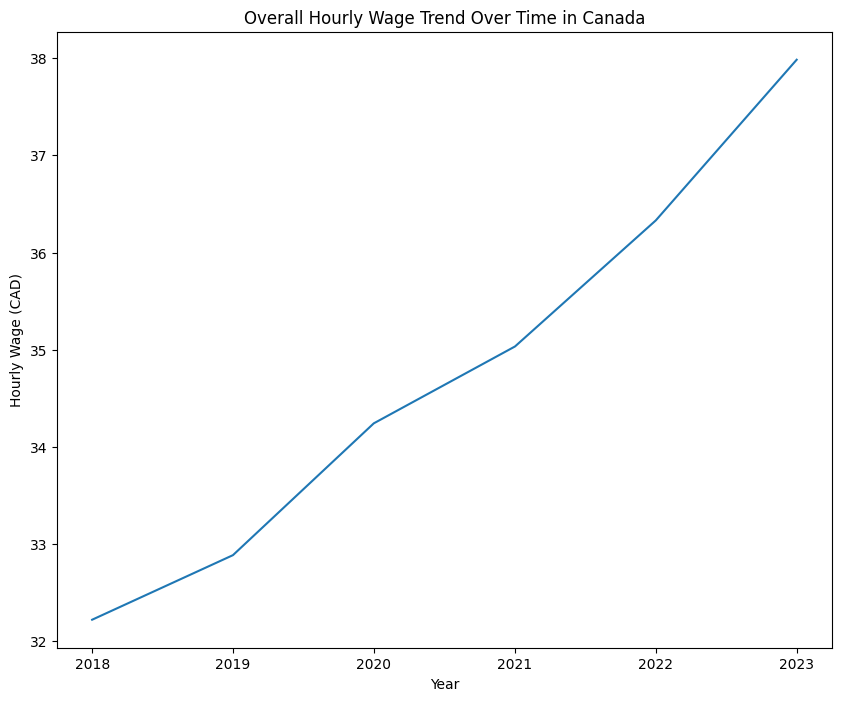

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Overall Hourly Wage Trend Over Time in Canada')
ax.set_xlabel('Year')
ax.set_ylabel('Hourly Wage (CAD)')
ax.plot(mean_values_grouped_by_dates['REF_DATE'], mean_values_grouped_by_dates['VALUE'])

# Wage Disparity: A Comparison by Occupation and Gender"

Secondly, the data reveals a significant gender wage gap in Canada, with women consistently earning less than men across various occupations. This disparity underscores systemic issues such as occupational segregation and unequal representation in higher-paying roles. Addressing these inequalities requires targeted actions, including policy reforms and workplace initiatives aimed at achieving pay equity for all workers.

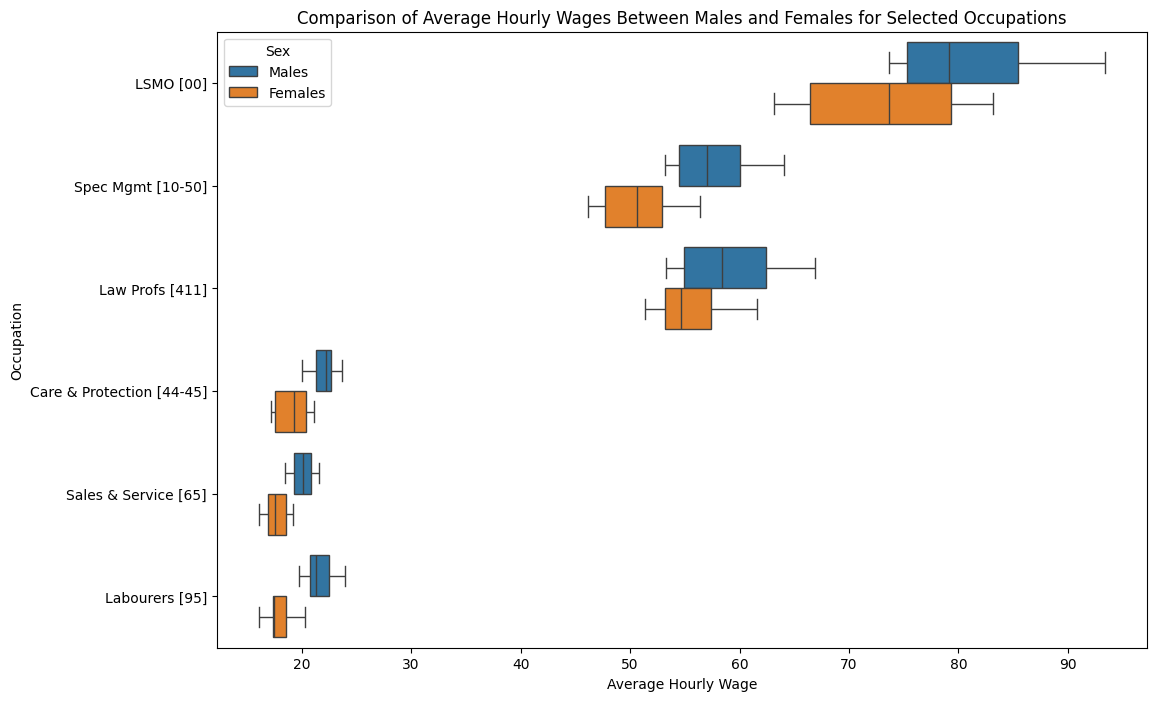

<Figure size 640x480 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='VALUE', y='National Occupational Classification (NOC)', hue='Sex', data=filtered_df_for_plot)
ax.set_title('Comparison of Average Hourly Wages Between Males and Females for Selected Occupations')
ax.set_xlabel('Average Hourly Wage')
ax.set_ylabel('Occupation')
plt.show()

# Job and Financial Security: Choosing Between Casual and Permanent Employment

Lastly, the data highlights disparities in earnings based on employment types, with full-time workers in Canada earning more than part-time or contract workers. This disparity underscores the impact of job security on wages and reflects industry demands and skill levels. By recognizing these disparities, policymakers can develop strategies to address wage inequality and enhance economic stability for all Canadian workers. Overall, the data on Canadian wages provides valuable insights into economic trends, gender disparities, and employment types, offering a comprehensive view of the factors influencing wage levels in the country.


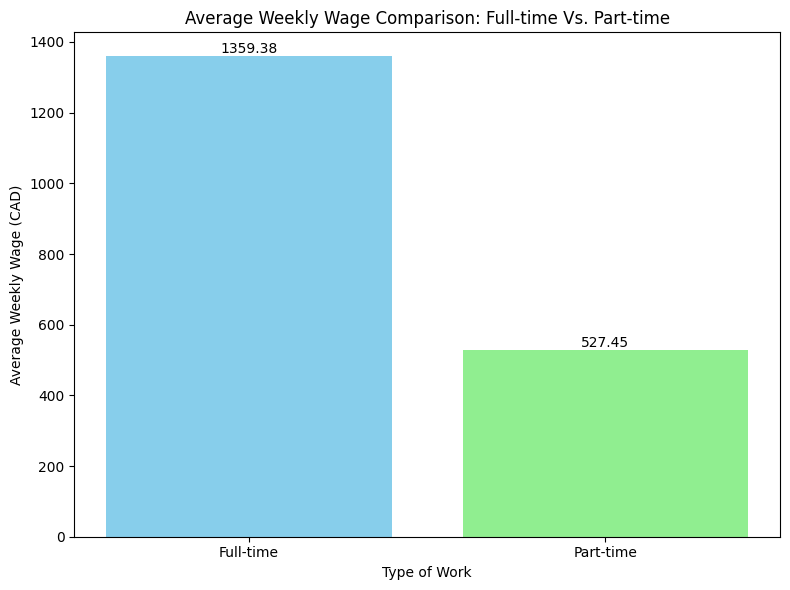

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(df_wage_comparison['Type of Work'], df_wage_comparison['Average Weekly Wage'], color=['skyblue', 'lightgreen'])
ax.set_title('Average Weekly Wage Comparison: Full-time Vs. Part-time')
ax.set_xlabel('Type of Work')
ax.set_ylabel('Average Weekly Wage (CAD)')

# annotating the bar chart with the data values
for i, value in enumerate(df_wage_comparison['Average Weekly Wage']):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('job_stability.png')